## Avant de commencer:

### import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# eviter Nan 
Nan_eviter = 1e-1

In [2]:
from lossFonction import *
from module import Module
from sequentiel import *
from optim import *

### Pour faciliter l'aprentissage

In [3]:
# pour mélanger l'ordre
def shuffle(datax,datay) :
    idx = np.random.permutation(len(datax))
    datax,datay = datax[idx], datay[idx]
    return datax,datay

## Teste sur Linéaire

In [4]:
from module import Linear

In [12]:
X = np.array([[1,2,3,4],[1,2,3,5],[9,10,11,12],[9,10,11,16],[9,10,12,12]])
Y = np.array([[1],[1],[-1],[-1],[-1]])
net = Sequentiel([Linear(4,1)])

[[-0.00858763]
 [-0.03812082]
 [-0.16576159]
 [-0.28389433]
 [-0.0999735 ]]


[array([0.80841538])]


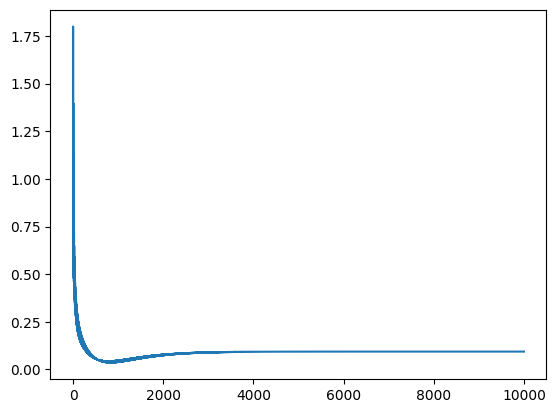

In [13]:
opti = Optim (net,MSELoss(),1e-3)
opti.backward(X,Y,maxite = 5000,batch_size = 2)
plt.plot(opti.cost)
plt.show()

In [14]:
opti.output, Y

(array([[ 0.99999963],
        [ 0.99999978],
        [-1.00000039],
        [-0.99999979],
        [-0.31573061]]),
 array([[ 1],
        [ 1],
        [-1],
        [-1],
        [-1]]))

## Teste sur non linéaire

In [16]:
from module import Sigmoide
from module import TanH

In [17]:
modules = [Linear(4,4),TanH(4,1)]
X = np.array([[1,2,3,4],[1,2,3,5],[9,10,11,12],[9,10,11,16],[9,10,12,12]])
Y = np.array([[1],[1],[-1],[-1],[-1]])
net = Sequentiel(modules)

[array([0.92141446])]


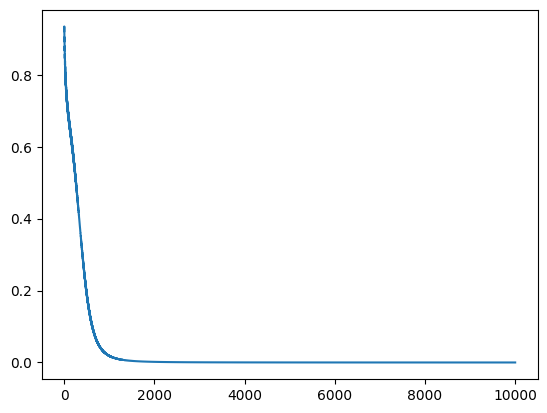

In [18]:
opti = Optim (net,MSELoss(),1e-3)
opti.backward(X,Y,maxite = 5000,batch_size = 2)
plt.plot(opti.cost)
plt.show()

In [19]:
opti.output, Y

(array([[ 0.98975867],
        [ 0.99896352],
        [-0.99999968],
        [-0.99692021],
        [-0.99999875]]),
 array([[ 1],
        [ 1],
        [-1],
        [-1],
        [-1]]))

## Teste sur encapsulage

## Teste sur multi-classe

In [22]:
from module import Softmax
modules = [Linear(4,4),Softmax(4,2)]
X = np.array([[1,2,3,4],[1,2,3,5],[9,10,11,12],[9,10,11,16],[9,10,12,12]])
Y = np.array([[1,0],[1,0],[0,1],[0,1],[0,1]])
net = Sequentiel(modules)

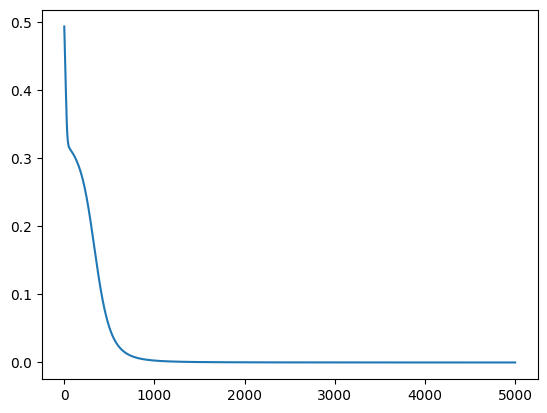

In [23]:
opti = Optim (net,MSELoss(),1e-3)
opti.backward(X,Y,maxite = 5000,batch_size = 4)
plt.plot(opti.cost)
plt.show()

In [24]:
np.argmax(opti.output,axis=1), np.argmax(Y,axis=1)

(array([0, 0, 1, 1, 1]), array([0, 0, 1, 1, 1]))

In [29]:
nb_data = 200

def f_bruit(datax,parametres,nb_data = nb_data,bruit = True):
    """
    in :
        x : (nb_data,inputsize)
        coef : liste de coefficient (inputsize,outputsize)
    out :
        res : f(x) (nb_data,outputsize)
        
    """
    res = datax@np.array(parametres)
    if bruit :
        res += np.random.randn (nb_data,1)
    return res

### logSoftMax

## Teste avec encoder et decoders sur les images

In [9]:
from Kmeans import *

<font color=gray> on définit le jeu de donnée : 
    
   <font color=gray> - entrée : n'importe quel dimension de données
    
   <font color=gray> - sortie : dimension 1

## <font color=green> 2.2 Une couche Lineaire

In [30]:
parametres = [[100],[2],[15],[16],[19]]
inputsize = 5
ouputsize = 1  # d'apres la définition de jeu de donnee

x = []
for _ in range (inputsize):
    x.append (np.random.uniform(-10,10,nb_data).reshape((-1,1)))
datax = np.reshape (x,(inputsize,nb_data)).T

datay = f_bruit(datax,parametres,bruit = False)

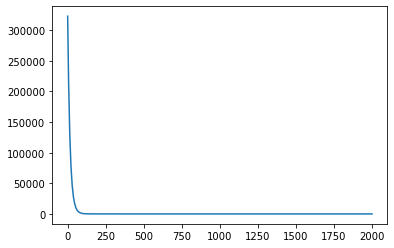

In [31]:
modules = [Linear(inputsize,1)]
net = Sequentiel(modules)

opti = Optim (net,MSELoss(),1e-5)
opti.backward(datax,datay,maxite = 500,batch_size = 50)
plt.plot(opti.cost)
plt.show()

### <font color=gray>  paramètre à appendre (Si on ne ajoute pas de bruit, il est parfaitement le paramètre on a définit)

In [32]:
net.modules[0]._parameters

array([[100.],
       [  2.],
       [ 15.],
       [ 16.],
       [ 19.]])

### <font color=gray> paramètre

In [33]:
parametres

[[100], [2], [15], [16], [19]]

## <font color=green> 2.3 Deux couches Lineaire

In [34]:
# couche 1
parametres1 = [[1,10],[-5,-20]]
inputsize1 = 2
ouputsize1 = 2

# génerer les données bruts(entrées)
x = []
for _ in range (inputsize1):
    x.append (np.random.uniform(-20,20,nb_data).reshape((-1,1)))
# print(np.shape(x)) # (2,nb_data)
datax = np.reshape (x,(inputsize1,nb_data)).T

datay = f_bruit(datax,parametres1,bruit = True) 
# print(np.shape(datay)) # (nb_data,2)

# couche 2
parametres2 = [[1],[-10]]
inputsize2 = ouputsize1
ouputsize2 = 1  # d'apres la définition de jeu de donnee

datay = f_bruit(datay,parametres2,bruit = False)

[[-7.05648173  1.64032449]
 [13.9151028  -3.15807135]]
[[13.32218183]
 [-3.03931472]]


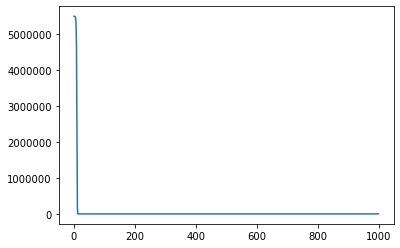

In [35]:
modules = [Linear(inputsize1,inputsize2),Linear(inputsize2,ouputsize2)]
net = Sequentiel(modules)

opti = Optim (net,MSELoss(),1e-7)
opti.backward(datax,datay,maxite = 500,batch_size = 100)
plt.plot(opti.cost)
print (net.modules[0]._parameters)
print (net.modules[1]._parameters)

### <font color=gray> combinaison des paramètres estimé 

In [36]:
net.modules[0]._parameters@net.modules[1]._parameters

array([[-98.99319498],
       [194.97790237]])

### <font color=gray>  combinaison des paramètres

In [37]:
np.array(parametres1)@np.array(parametres2)

array([[-99],
       [195]])

<font color=hotpink size =4>  attention : ici $\verb|net.modules[0]._parameters|$  n'est pas forcement $\verb|parametres1|$. Mais, la combinaison faut même 

## <font color=green> 2.4 Plusieur couches Lineaire

In [38]:
def Lineaire_test (list_parametres,nb_data=nb_data,bruit = False,maxite = 5000,eps = 1e-5,batch_size = 100,Nan_eviter = 1e-1):
    inputsize = len(list_parametres[0])
    
    # génerer les données bruts(entrées)
    x = []
    for _ in range (inputsize):
        x.append (np.random.uniform(-10,10,nb_data).reshape((-1,1)))
    datax = np.reshape (x,(inputsize,nb_data)).T
    datay = datax.copy()
    
    modules = []
    true_parametres = np.identity(inputsize)
    # parcours des couche
    for parametres in list_parametres :
        datay = f_bruit(datay,parametres,bruit = bruit)
        inputsize,outputsize = np.shape(parametres)
        modules.append (Linear(inputsize,outputsize,Nan_eviter))
        true_parametres = true_parametres@parametres
    
    # train
    net = Sequentiel(modules)
    opti = Optim (net,MSELoss(),eps)
    opti.backward(datax,datay,maxite = maxite)
    plt.plot(opti.cost)
    plt.show()
    
    # parametre estime
    parametres_estime = np.identity(inputsize)
    for i in range(len(modules)):
        parametres_estime = parametres_estime@net.modules[i]._parameters
    
    # compare les deux
    print ("parametres estime : \n",parametres_estime,"\nparametres reel : \n",true_parametres)
    return net

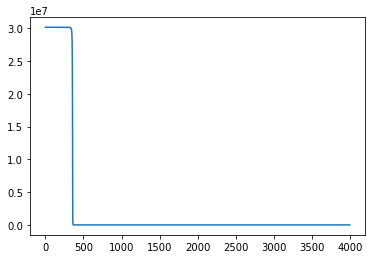

parametres estime : 
 [[ 280.]
 [-968.]] 
parametres reel : 
 [[ 280.]
 [-968.]]


In [39]:
list_parametres = [
    [[1,2,10],[-5,2,-20]],
    [[1,-10],[2,5],[3,0]],
    [[8],[-8]]
]
Nan_eviter = 1e-2
net = Lineaire_test (list_parametres,nb_data=200,maxite = 1000,eps = 1e-8,batch_size = 100)

# <font color=darkblue> 3 Analyse de data *MNIST* (classification) 
  <font color=darkblue> pour vérifier que notre Réseau marche bien

## <font color=green> DataSet pour cette partie

In [40]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

nb_train = 5000
nb_test = 100
inputsize = 256

uspsdatatrain = "Mnist/USPS_train.txt"
uspsdatatest = "Mnist/USPS_test.txt"
alltrainx,alltrainy = load_usps(uspsdatatrain)
alltestx,alltesty = load_usps(uspsdatatest)

datax,datay_singleton = alltrainx[:nb_train],alltrainy[:nb_train]
dataxtest,datay_singletontest = alltestx[:nb_test],alltesty[:nb_test]

nb_train,inputsize = datax.shape
classr = np.unique(datay_singleton)
nb_class = len(np.unique(datay_singleton))

print ("nombre classe : ",nb_class)
print ("train : ",datax.shape)
print ("test : ",dataxtest.shape)
print ("valeur de image : de ",np.min(datax)," à ",np.max(datax))

nombre classe :  10
train :  (5000, 256)
test :  (100, 256)
valeur de image : de  0.0  à  2.0


## <font color=green> 3.1 Transfert $\verb|datay|$ de taille $\verb|(nb_train,1)|$ à $\verb|(nb_train,nb_class)|$ (onehot)

### <font color=LightBlue> méthode 1

### <font color=LightBlue> méthode 2

In [41]:
datay = np.zeros((datay_singleton.size,nb_class))
datay[np.arange(datay_singleton.size),datay_singleton]=1

dataytest = np.zeros((datay_singletontest.size,nb_class))
dataytest[np.arange(datay_singletontest.size),datay_singletontest]=1

## <font color=green> 3.2 Classification des *MNIST*

### <font color=lightblue> 3.2.1 méthode supervisé

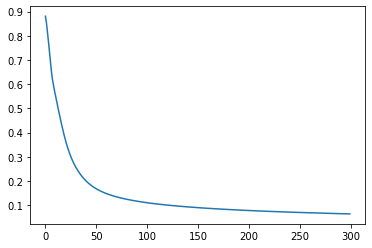

In [60]:
Nan_eviter = 1e-1
modules = [Linear(inputsize,10,Nan_eviter),Softmax(10,nb_class,Nan_eviter)]
net = Sequentiel(modules)

opti = Optim (net,MSELoss(),2*1e-5)
opti.backward(datax,datay,maxite = 300,batch_size = nb_train)
plt.plot(opti.cost)
plt.show()

#### <font color=gray> précision (train)

In [61]:
np.mean(np.argmax(opti.output,axis=1)==datay_singleton)

0.96

#### <font color=gray> précision (test)

In [62]:
np.mean(np.argmax(net.forward(dataxtest),axis=1)==datay_singletontest)

0.95

#### <font color=gray> classe size (pour chaque classe i concrete)

In [63]:
np.bincount(np.argmax(opti.output,axis=1))

array([846, 677, 480, 390, 439, 351, 483, 450, 385, 499], dtype=int64)

### <font color=lightblue> 3.2.2 méthode non supervisé

#### <font color=gray> 3.2.2.1 Kmeans
<font color=hotpink> on ajoute une colonne pour vérifier les classes de chaque echantillion et c'est ne change pas beaucoup parceque la dimension et 256 (257 ne change pas beaucoup) 

In [64]:
data_kmeans = np.hstack((datax,datay_singleton.reshape(-1,1)))
data_kmeans.shape

(5000, 257)

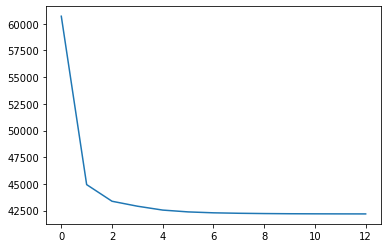

nombre d'echantillion dans chaque cluster :  [477, 697, 809, 484, 226, 549, 273, 678, 359, 448]


In [65]:
kmeans = KMeans(data_kmeans,k=nb_class)
kmeans.fit()
plt.plot(kmeans.cost)
plt.show()
print ("nombre d'echantillion dans chaque cluster : ",kmeans.cluster_sizes)

In [66]:
classe_estimer = []
cluster_classe_estimer = []
for cluster in kmeans.clusters:
    tmp = np.array(cluster)[:,-1]
    classe_estimer.append(tmp)
    cluster_classe_estimer.append(np.argmax(np.bincount(np.int0(tmp))))
print ("la classe estimé pour chaque cluster : ",cluster_classe_estimer)

la classe estimé pour chaque cluster :  [7, 1, 9, 6, 0, 4, 0, 3, 0, 2]


### <font color=hotpink size =4> on ne sait pas c'est quelle classe répresenté par chaque cluster, mais la distribution est proches par rapport la distribution de données réelles ( $\verb|np.bincount(np.argmax(opti.output,axis=1))|$ )<br/>
    
<font color=hotpink> Par exemple, ici on peut dire que <br/>
le premier cluster est de classe 7 de 477 échantillons et réellement classe 7 de 450 échantillons <br/>
le deuxième cluster est de classe 1 de 697 échantillons et réellement classe 1 de 677 échantillons <br/>

#### <font color=gray> 3.2.2.2 t-SNE

In [68]:
from sklearn.manifold import TSNE
import warnings
warnings.simplefilter("ignore")
import seaborn as sb

In [69]:
X_embedded = TSNE(perplexity=30).fit_transform(datax)

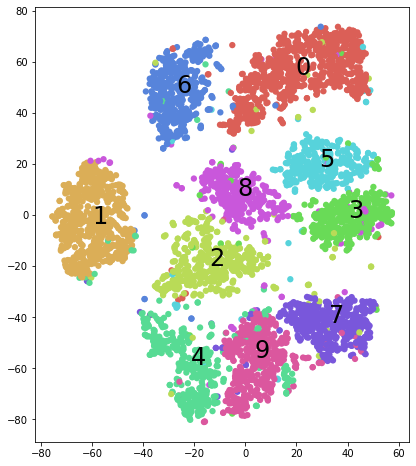

In [70]:
def plot(x, labels):
    # choisir color palette 
    palette = np.array(sb.color_palette("hls", 10))

    # créer scatter plot
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[labels.astype(np.int)])
    
    for i in range(nb_class):
        # Position de barycentre pour chaque label
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        ax.text(xtext, ytext, str(i), fontsize=24)
    plt.show()

plot(X_embedded,datay_singleton)

# <font color=darkblue> 4 Encodage et Décodage (on utilise *MNIST*)

## <font color=green> DataSet pour cette partie

In [115]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

nb_train = 5000
nb_test = 100
inputsize = 256

uspsdatatrain = "Mnist/USPS_train.txt"
uspsdatatest = "Mnist/USPS_test.txt"
alltrainx,alltrainy = load_usps(uspsdatatrain)
alltestx,alltesty = load_usps(uspsdatatest)

datax,datay_singleton = alltrainx[:nb_train],alltrainy[:nb_train]
dataxtest,datay_singletontest = alltestx[:nb_test],alltesty[:nb_test]

nb_train,inputsize = datax.shape
classr = np.unique(datay_singleton)
nb_class = len(np.unique(datay_singleton))

print ("nombre classe : ",nb_class)
print ("train : ",datax.shape)
print ("test : ",dataxtest.shape)
print ("valeur de image : de ",np.min(datax)," à ",np.max(datax))

nombre classe :  10
train :  (5000, 256)
test :  (100, 256)
valeur de image : de  0.0  à  2.0


## <font color=green> 4.1 Si on normalise `datax`

In [42]:
def normalize(data):
    tmp = (data-np.min(data)) / (np.max(data)-np.min(data))
    return tmp + np.min(tmp)

datax_entre01 = normalize(datax)
datax_entre01_test = normalize(dataxtest)

### <font color=gray>  4.1.1 Net de exemple de sujet

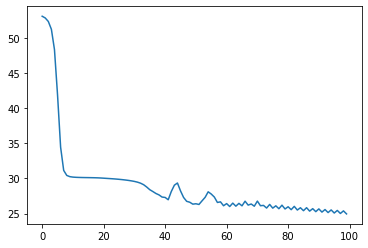

In [43]:
Nan_eviter = 1e-1
p = False
modulesEncodageDecodage1 = [
    TanH(inputsize,100,Positive_parameters=p,Nan_eviter=Nan_eviter),
    TanH(100,nb_class,Positive_parameters=p,Nan_eviter=Nan_eviter),
    TanH(nb_class,100,Positive_parameters=p,Nan_eviter=Nan_eviter),
    Sigmoide(100,inputsize,Positive_parameters=p,Nan_eviter=Nan_eviter)
]
netEncodageDecodage1 = Sequentiel(modulesEncodageDecodage1)

opti1 = Optim (netEncodageDecodage1,MSELoss(),1e-5)
opti1.backward(datax_entre01,datax_entre01,maxite = 100 ,batch_size = nb_train)
plt.plot(opti1.cost)
plt.show()

### <font color=gray> précision (on ne peut pas calcule le précision, on peut just observer les images)

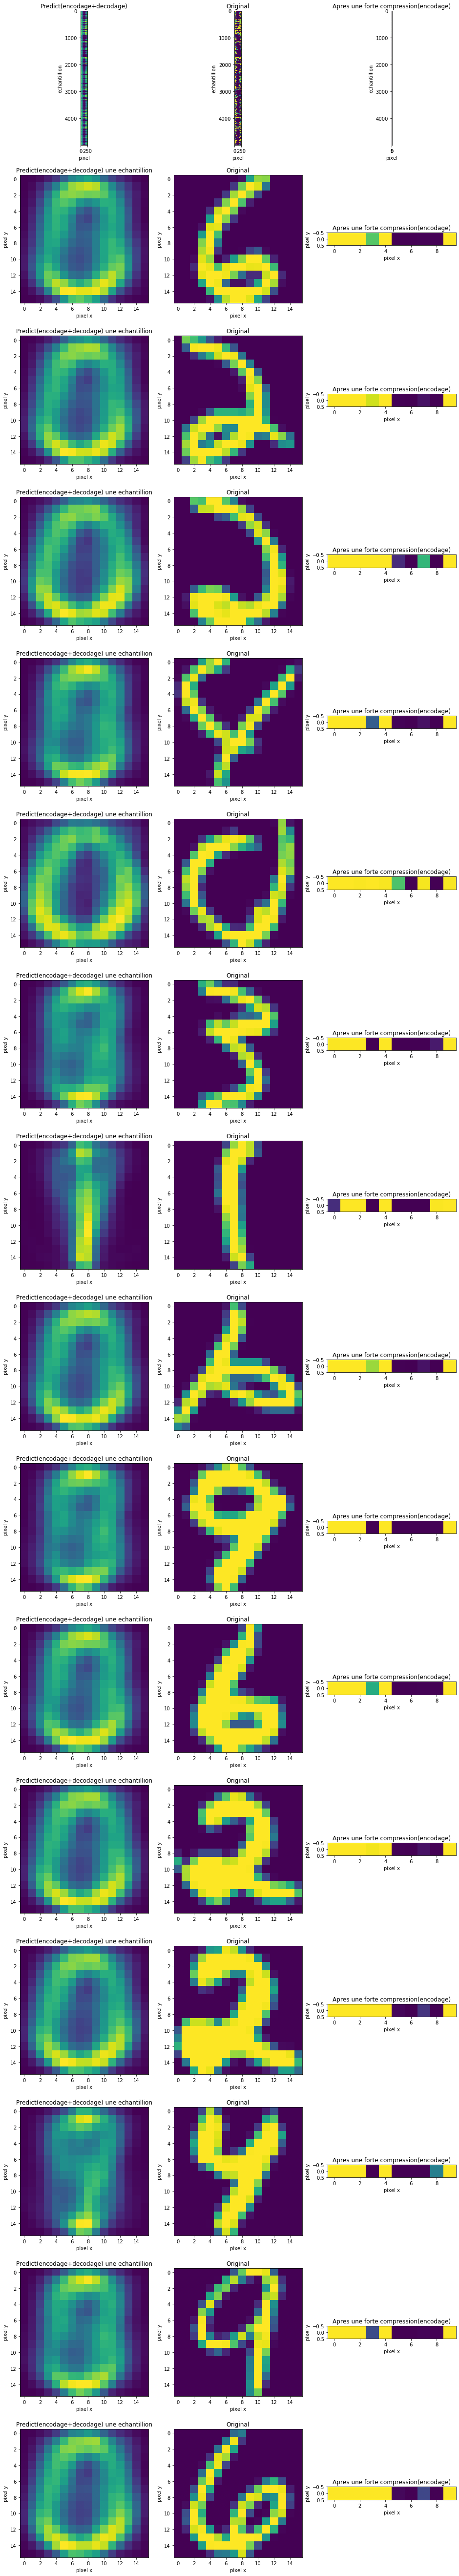

In [51]:
def affichier_resultat(opti,datax,echantillions,entre_01 = True) :
    N,_ = echantillions.shape
    plt.figure(figsize=(16,6*(N+1)))
    
    plt.subplot(N+1,3,1)
    plt.imshow(opti.output)
    plt.title("Predict(encodage+decodage)")
    plt.xlabel("pixel")
    plt.ylabel("echantillion")
    
    plt.subplot(N+1,3,2)
    plt.imshow(datax)
    plt.title("Original")
    plt.xlabel("pixel")
    plt.ylabel("echantillion")
    
    netEncodageDecodage = opti.net
    module_encodage = netEncodageDecodage.modules[:2]
    netEncodage = Sequentiel(module_encodage)
    
    plt.subplot(N+1,3,3)
    plt.imshow(netEncodage.forward(datax))
    plt.title("Apres une forte compression(encodage)")
    plt.xlabel("pixel")
    plt.ylabel("echantillion")
    
    netEncodageDecodage = opti.net
    
    
    for i in range(N) :
        echantillion = np.array([echantillions[i]])
        plt.subplot(N+1,3,3*i+4)
        if entre_01 :
            plt.imshow(netEncodageDecodage.forward(echantillion).reshape(16,16))
        else :
            plt.imshow((netEncodageDecodage.forward(echantillion)>0.5).reshape(16,16))
        plt.title("Predict(encodage+decodage) une echantillion")
        plt.xlabel("pixel x")
        plt.ylabel("pixel y")

        plt.subplot(N+1,3,3*i+5)
        plt.imshow(echantillion.reshape(16,16))
        plt.title("Original")
        plt.xlabel("pixel x")
        plt.ylabel("pixel y")

        plt.subplot(N+1,3,3*i+6)
        plt.imshow(netEncodage.forward(echantillion).reshape(1,-1))
        plt.title("Apres une forte compression(encodage)")
        plt.xlabel("pixel x")
        plt.ylabel("pixel y")
    plt.show()
    
    return netEncodageDecodage,netEncodage
    

netEncodageDecodage1,netEncodage1 = affichier_resultat(opti1,datax_entre01,datax_entre01_test[10:25])

### <font color=gray>  4.1.2 Net on crée

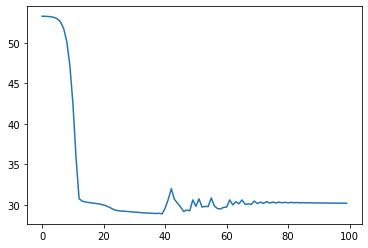

In [126]:
Nan_eviter = 1e-2
modulesEncodageDecodage2 = [
    Linear(inputsize,50,Nan_eviter=Nan_eviter),
    Sigmoide(50,nb_class,Nan_eviter=Nan_eviter),
    Linear(nb_class,50,Nan_eviter=Nan_eviter),
    Sigmoide(50,inputsize,Nan_eviter=Nan_eviter)
]
netEncodageDecodage2 = Sequentiel(modulesEncodageDecodage2)

opti2 = Optim (netEncodageDecodage2,MSELoss(),1e-5)
opti2.backward(datax_entre01,datax_entre01,maxite = 100,batch_size = nb_train)
plt.plot(opti2.cost)
plt.show()

### <font color=gray> précision (on ne peut pas calcule le précision, on peut just observer les images)

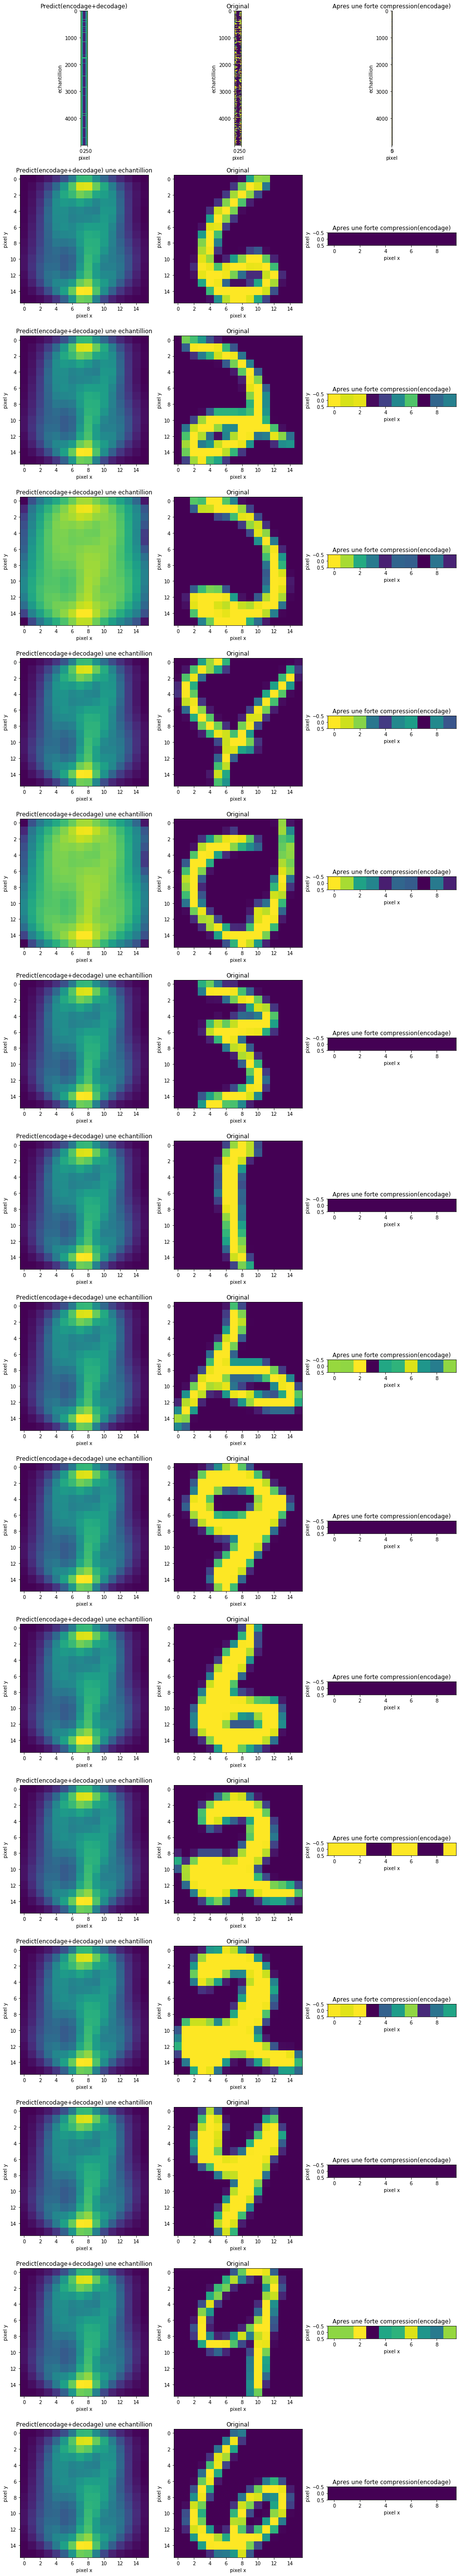

In [127]:
netEncodageDecodage2,netEncodage2 = affichier_resultat(opti2,datax_entre01,datax_entre01_test[10:25])

## <font color=green> 4.2 Si on transfert $\verb|datax|$ ver type 0-1 
<font color=hotpink size=4>  on peut evaluer notre auto-encodeur par cette méthode

In [52]:
datax_01 = (datax>0)*1
datax_01_test = (dataxtest>0)*1

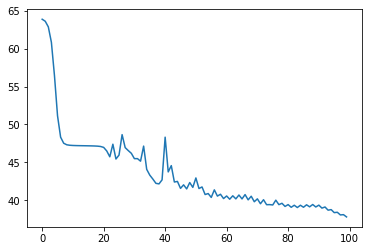

In [62]:
Nan_eviter = 1e-1
p = False
modulesEncodageDecodage3 = [
    TanH(inputsize,100,Positive_parameters=p,Nan_eviter=Nan_eviter),
    TanH(100,nb_class,Positive_parameters=p,Nan_eviter=Nan_eviter),
    TanH(nb_class,100,Positive_parameters=p,Nan_eviter=Nan_eviter),
    Sigmoide(100,inputsize,Positive_parameters=p,Nan_eviter=Nan_eviter)
]
netEncodageDecodage3 = Sequentiel(modulesEncodageDecodage3)

opti3 = Optim (netEncodageDecodage3,MSELoss(),1e-5)
opti3.backward(datax_01,datax_01,maxite = 100, batch_size = nb_train)
plt.plot(opti3.cost)
plt.show()

### <font color=gray>  précision (train)

In [63]:
np.mean((opti3.output>0.5) == datax_01)

0.78044140625

### <font color=gray>  précision (test)

In [64]:
np.mean((netEncodageDecodage3.forward(datax_01_test)>0.5)==datax_01_test)

0.7601171875

### <font color=hotpink> on peut dire que notre auto-encodeur conserve 75% de données

### <font color=gray>  les images

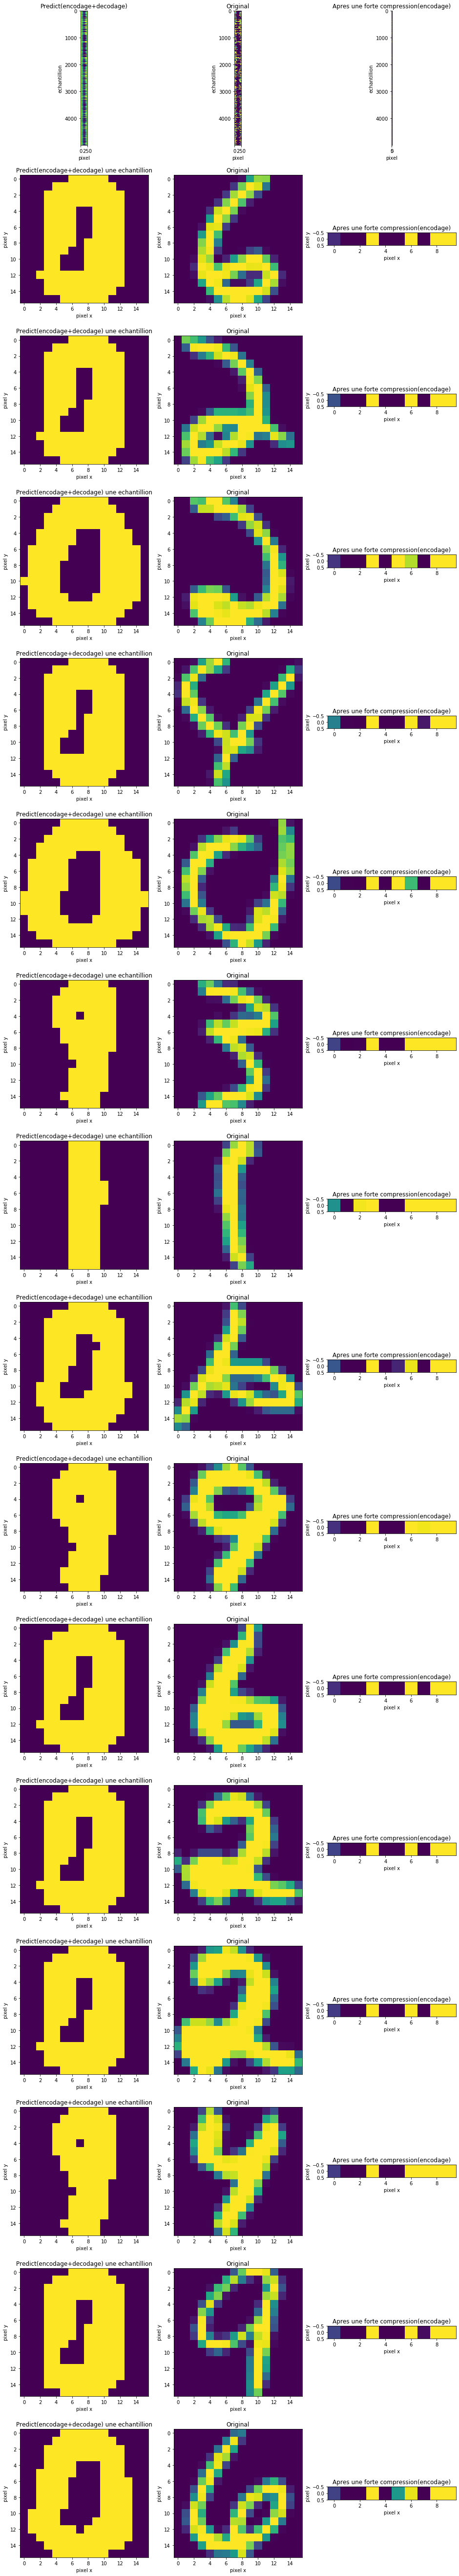

Tous les test : 


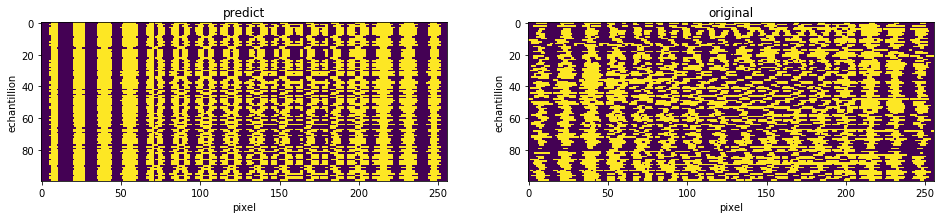

In [65]:
netEncodageDecodage3,netEncodage3 = affichier_resultat(opti3,datax_entre01,datax_entre01_test[10:25],entre_01=False)
print ("Tous les test : ")
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.imshow((netEncodageDecodage3.forward(datax_01_test)>0.5))
plt.title("predict")
plt.xlabel("pixel")
plt.ylabel("echantillion")
plt.subplot(1,2,2)
plt.imshow(datax_01_test)
plt.title("original")
plt.xlabel("pixel")
plt.ylabel("echantillion")
plt.show()

## <font color=green> 4.3 Les performances en débruitage
<font color=green>  il n y pas de sens si on bruite les données de type 0-1, donc on traiter les données normalisées

In [76]:
datax_entre01 = normalize(datax)
datax_entre01_bruit = normalize(datax+0.1*np.random.normal(0, 1, size=datax.shape))
datax_entre01_test = normalize(dataxtest)

<font color=hotpink>  $\verb|normalize(datax+np.random.normal(0,1,size=datax.shape))|$ va retourner les resultats proches pour chaque echantiilion 

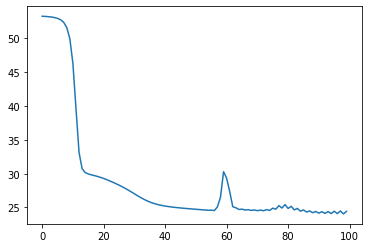

In [77]:
Nan_eviter = 1e-1
modulesEncodageDecodage4 = [
    TanH(inputsize,100,Positive_parameters=p,Nan_eviter=Nan_eviter),
    TanH(100,nb_class,Positive_parameters=p,Nan_eviter=Nan_eviter),
    TanH(nb_class,100,Positive_parameters=p,Nan_eviter=Nan_eviter),
    Sigmoide(100,inputsize,Positive_parameters=p,Nan_eviter=Nan_eviter)
]
netEncodageDecodage4 = Sequentiel(modulesEncodageDecodage4)

opti4= Optim (netEncodageDecodage4,MSELoss(),1e-5)
opti4.backward(datax_entre01_bruit,datax_entre01,maxite = 100, batch_size = nb_train)
plt.plot(opti4.cost)
plt.show()

### <font color=gray>  non bruité

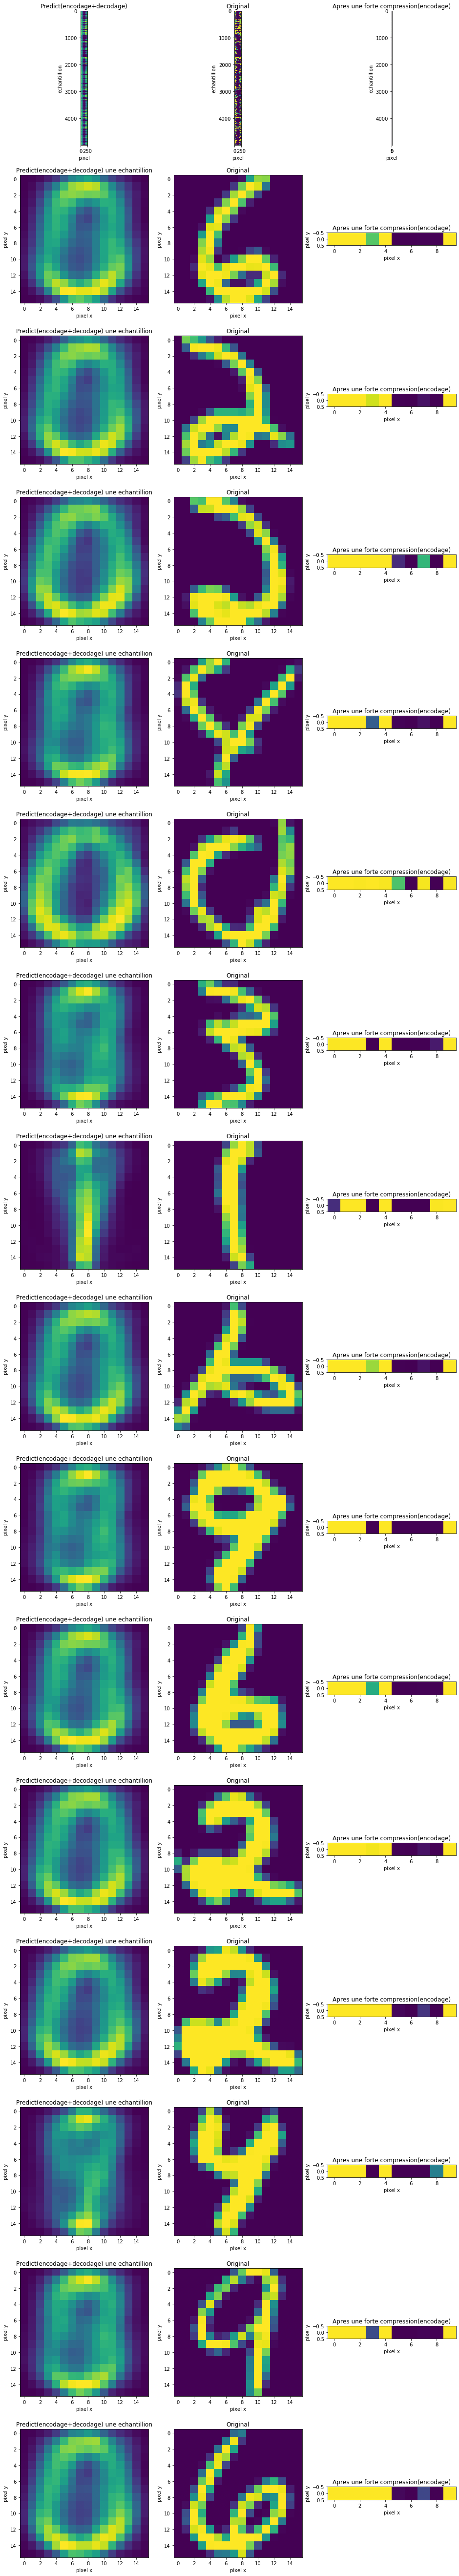

In [78]:
netEncodageDecodage1,netEncodage1 = affichier_resultat(opti1,datax_entre01,datax_entre01_test[10:25])

### <font color=gray>  bruité

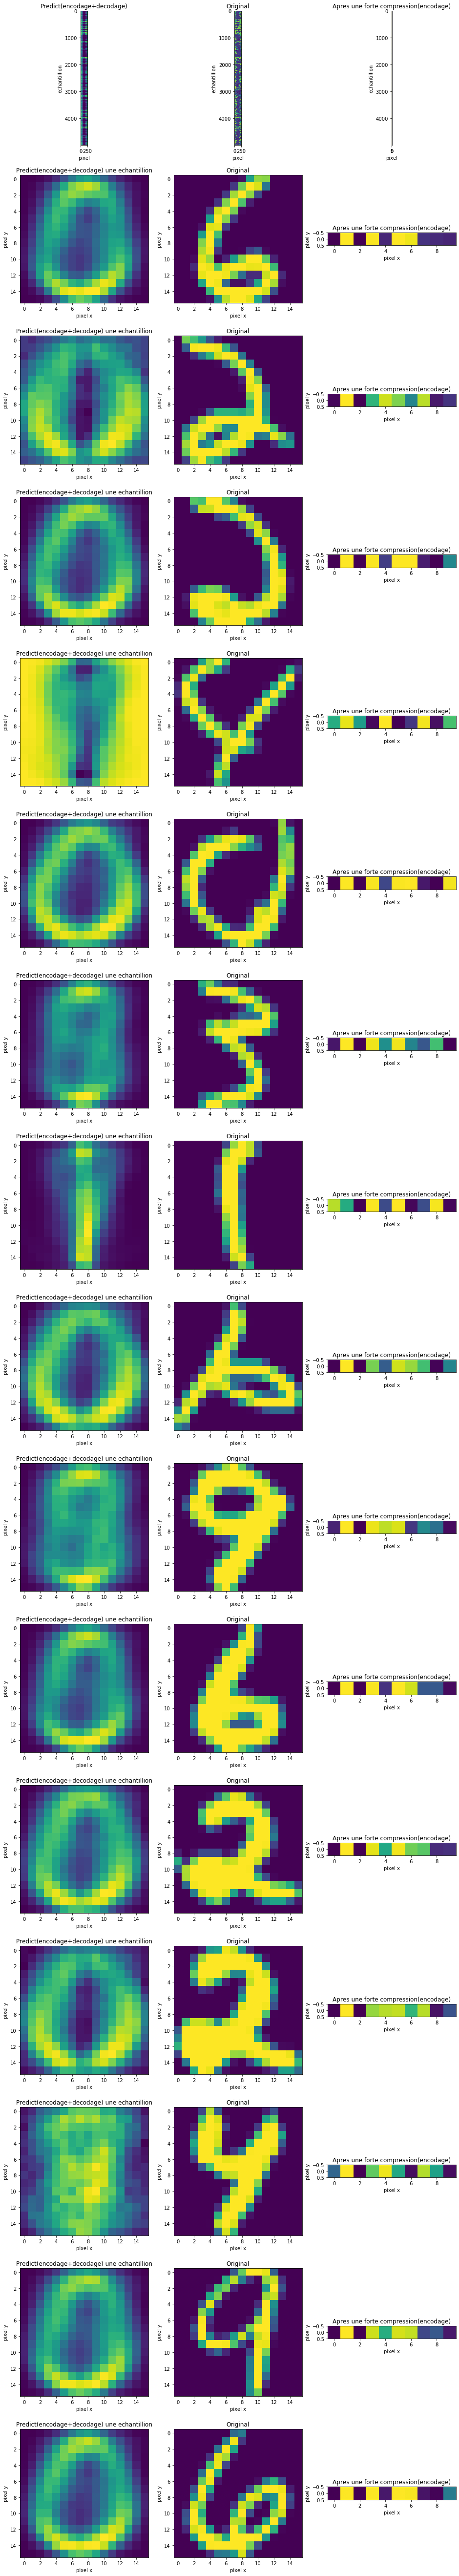

In [79]:
netEncodageDecodage4,netEncodage4 = affichier_resultat(opti4,datax_entre01_bruit,datax_entre01_test[10:25])

## <font color=green> 4.4 Le pré-traitement par  l'auto-encodeur et faire la classification
<font color=green> on fait avec les données normalisées

### <font color=gray>  4.4.1 Non bruité ($\verb|opti1|$)

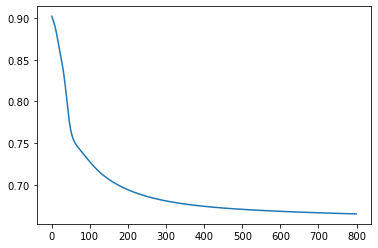

In [123]:
netEncodageDecodage1 = opti1.net
datax_train441 = netEncodageDecodage1.forward(datax_entre01)

Nan_eviter = 1e-1
modules441 = [Linear(inputsize,10,Nan_eviter),Softmax(10,nb_class,Nan_eviter)]
net441 = Sequentiel(modules441)

opti441 = Optim (net441,MSELoss(),1e-5)
opti441.backward(datax_train441,datay,maxite = 800,batch_size = nb_train)
plt.plot(opti441.cost)
plt.show()

In [124]:
np.mean(np.argmax(opti441.output,axis=1)==datay_singleton)

0.4124

In [125]:
np.mean(np.argmax(net441.forward(dataxtest),axis=1)==datay_singletontest)

0.37

### <font color=gray>  4.4.2 Bruité ($\verb|opti4|$)

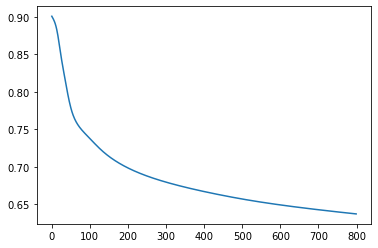

In [112]:
netEncodageDecodage4 = opti4.net
datax_train442 = netEncodageDecodage4.forward(datax_entre01_bruit)

Nan_eviter = 1e-1
modules442 = [Linear(inputsize,10,Nan_eviter),Softmax(10,nb_class,Nan_eviter)]
net442 = Sequentiel(modules442)

opti442 = Optim (net442,MSELoss(),1e-5)
opti442.backward(datax_train442,datay,maxite = 800,batch_size = nb_train)
plt.plot(opti442.cost)
plt.show()

In [113]:
np.mean(np.argmax(opti442.output,axis=1)==datay_singleton)

0.4788

In [114]:
np.mean(np.argmax(net442.forward(dataxtest),axis=1)==datay_singletontest)

0.47

## <font color=green> Conclusion : 
    
  <font color=hotpink> 1. le bruit va améliorer un peu mais pour la classification c'est pas nécessaire de trouver l'auto-encodeur <br/>
  <font color=hotpink> 2. la performance de Réseau non convolutionnal est très mauvaise <br/>
  <font color=hotpink> 3. la performance de Réseau non convolutionnal va améliorer, si on juste entraîn pas grand nombre d'echantillions (25 par exemple) <br/>
  <font color=hotpink> 4. on peut faire plus d'itérations et plus d'echantillions pour l'apprentissage pour améliorer la performance <br/>
      
<font color=green>Pour la fonction de cout :  
<font color=hotpink> 1. $\verb|CE|$ est inutile pour tous les deux cas, parce que la dernière couche n'est pas $\verb|Softmax|$, et $\verb|Sigmoide|$ minimise $\verb|BCE|$ si les résultat sont tous 1 <br/>
<font color=hotpink> 2. $\verb|MSE|$ fonctionne mieux que $\verb|BCE|$ <br/>

# <font color=darkblue> 5 Convolution

## <font color=green> DataSet pour cette partie

In [11]:
from module import Conv1D
from module import MaxPool1D
from module import Flatten
from module import ReLU

from module import AvgPool1D

In [12]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

nb_train = 500
nb_test = 100
inputsize = 256

uspsdatatrain = "Mnist/USPS_train.txt"
uspsdatatest = "Mnist/USPS_test.txt"
alltrainx,alltrainy = load_usps(uspsdatatrain)
alltestx,alltesty = load_usps(uspsdatatest)

datax,datay_singleton = alltrainx[:nb_train],alltrainy[:nb_train]
dataxtest,datay_singletontest = alltestx[:nb_test],alltesty[:nb_test]

nb_train,inputsize = datax.shape
classr = np.unique(datay_singleton)
nb_class = len(np.unique(datay_singleton))

print ("nombre classe : ",nb_class)
print ("train : ",datax.shape)
print ("test : ",dataxtest.shape)
print ("valeur de image : de ",np.min(datax)," à ",np.max(datax))

datay = np.zeros((datay_singleton.size,nb_class))
datay[np.arange(datay_singleton.size),datay_singleton]=1

dataytest = np.zeros((datay_singletontest.size,nb_class))
dataytest[np.arange(datay_singletontest.size),datay_singletontest]=1

nombre classe :  10
train :  (500, 256)
test :  (100, 256)
valeur de image : de  0.0  à  2.0


###  <font color=gray>  Normaliser

In [13]:
def normalize(data):
    tmp = (data-np.min(data)) / (np.max(data)-np.min(data))
    return tmp + np.min(tmp)

datax_entre01 = normalize(datax)
datax_entre01_test = normalize(dataxtest)

print (datax_entre01.shape)

(500, 256)


### <font color=gray> Ajouter channel

In [14]:
datax_entre01 = datax_entre01[:,:,np.newaxis]
datax_entre01_test = datax_entre01_test[:,:,np.newaxis]
print (datax_entre01.shape)

(500, 256, 1)


## <font color=green> Test

### <font color=gray> MaxPooling

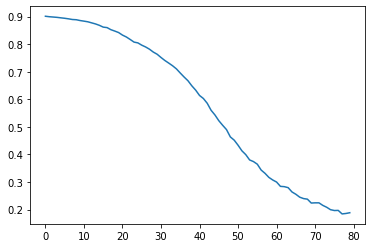

In [36]:
Nan_eviter = 1e-1
modulesEncodageDecodageCNN = [
    Conv1D(chan_in=1,chan_out=32,k_size=3,Nan_eviter=Nan_eviter),
    MaxPool1D(k_size=2,stride=2),
    Flatten(),
    ReLU(input=4064,output=100,Nan_eviter=Nan_eviter),
    Softmax(input=100,output=10,Nan_eviter=Nan_eviter)
]
netCNN = Sequentiel(modulesEncodageDecodageCNN)

optiCNN= Optim (netCNN,MSELoss(),5*1e-4)
optiCNN.backward(datax_entre01,datay,maxite = 10, batch_size = nb_train//8)
plt.plot(optiCNN.cost)
plt.show()

In [37]:
np.mean(np.argmax(optiCNN.output,axis=1)==datay_singleton)

0.884

In [38]:
np.mean(np.argmax(netCNN.forward(datax_entre01_test),axis=1)==datay_singletontest)

0.82

### <font color=gray> AvgPooling

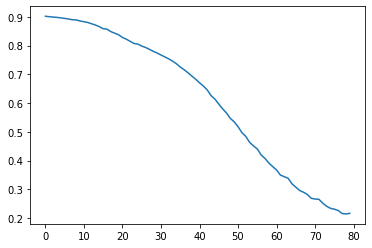

In [15]:
Nan_eviter = 1e-1
modulesEncodageDecodageCNN = [
    Conv1D(chan_in=1,chan_out=32,k_size=3,Nan_eviter=Nan_eviter),
    AvgPool1D(k_size=2,stride=2),
    Flatten(),
    ReLU(input=4064,output=100,Nan_eviter=Nan_eviter),
    Softmax(input=100,output=10,Nan_eviter=Nan_eviter)
]
netCNN = Sequentiel(modulesEncodageDecodageCNN)

optiCNN= Optim (netCNN,MSELoss(),5*1e-4)
optiCNN.backward(datax_entre01,datay,maxite = 10, batch_size = nb_train//8)
plt.plot(optiCNN.cost)
plt.show()

In [16]:
np.mean(np.argmax(optiCNN.output,axis=1)==datay_singleton)

0.87

In [17]:
np.mean(np.argmax(netCNN.forward(datax_entre01_test),axis=1)==datay_singletontest)

0.83